In [2]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3, 7)

import cv2 as cv
import numpy as np

# Make sure that OpenCV optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

## Exercises
1.Load and display the image 'dog.jif'. Save the image in png format

In [18]:
#Ans
img1 = cv.imread('images/dog.jfif')
cv.imshow("dog", img1)
cv.waitKey(0)
cv.destroyAllWindows()

cv.imwrite('dog.png',img1)

True

2.Suggest 2 ways and write codes to display 2 images simultaneously. You can use any image snapped from your handphone, downloaded from internet or images from weekly materials on MS teams. The 2 images are original color image and its corresponding grayscale image.

In [3]:
#ANS
#1. Manual way, display it without code optimization
img2 = cv.imread('images/soccer.jpg')
img2_grayscale = cv.imread('images/soccer.jpg', 0)

cv.imshow("original", img2)
cv.imshow('grayscale', img2_grayscale)
cv.waitKey(0)
cv.destroyAllWindows()



In [4]:
#2. using function, Optimize the code
def display_images(images,titles):
    for image, title in zip(images, titles):
        cv.imshow(title,image)
    cv.waitKey(0)
    cv.destroyAllWindows()

display_images([img2,img2_grayscale], ("original","grayscale"))

3.Write codes that performs the following:
<br>Load the video “img_pexels.mp4” into the Python environment, resize it and display the videos with smaller frames (The frames can be of any size, as long as it is smaller). You can specify an arbitrary frame rate.
<br>Save it as a separate files: “smaller_img_pexels.avi” or "smaller_img_pexels.mp4"

In [14]:
#ANS
def rescale_frame(frame_input, percent=50):
    width = int(frame_input.shape[1] * percent / 100)
    height = int(frame_input.shape[0] * percent / 100)
    dim = (width, height)
    return cv.resize(frame_input, dim, interpolation=cv.INTER_AREA)


cap = cv.VideoCapture("videos/img_pexels.mp4")

if cap.isOpened():
    ret, frame = cap.read()
    rescaled_frame = rescale_frame(frame)
    (h, w) = rescaled_frame.shape[:2]
    fourcc = cv.VideoWriter_fourcc(*'mp4v')
    out = cv.VideoWriter('smaller_img_pexels.mp4',
                             fourcc, 15.0,
                             (w, h), True)
else:
    print("Frame not received")

while cap.isOpened():
    ret, frame = cap.read()

    rescaled_frame = rescale_frame(frame)
    rescaled_frame = cv.resize(rescaled_frame, (224,224))
    # write the output frame to file
    out.write(rescaled_frame)

    cv.imshow("Output", rescaled_frame)
    key = cv.waitKey(1) & 0xFF
    if key == 27:
        break



cap.release()
out.release()
cv.destroyAllWindows()




4. Enlarge the image "dog.Jfif" by using different techniques.
   <br>A.Linear interpoation
   <br>B.Cubic interpolation
   <br>C.Nearest neighbor interporlation.

In [29]:
from IPython.display import Image

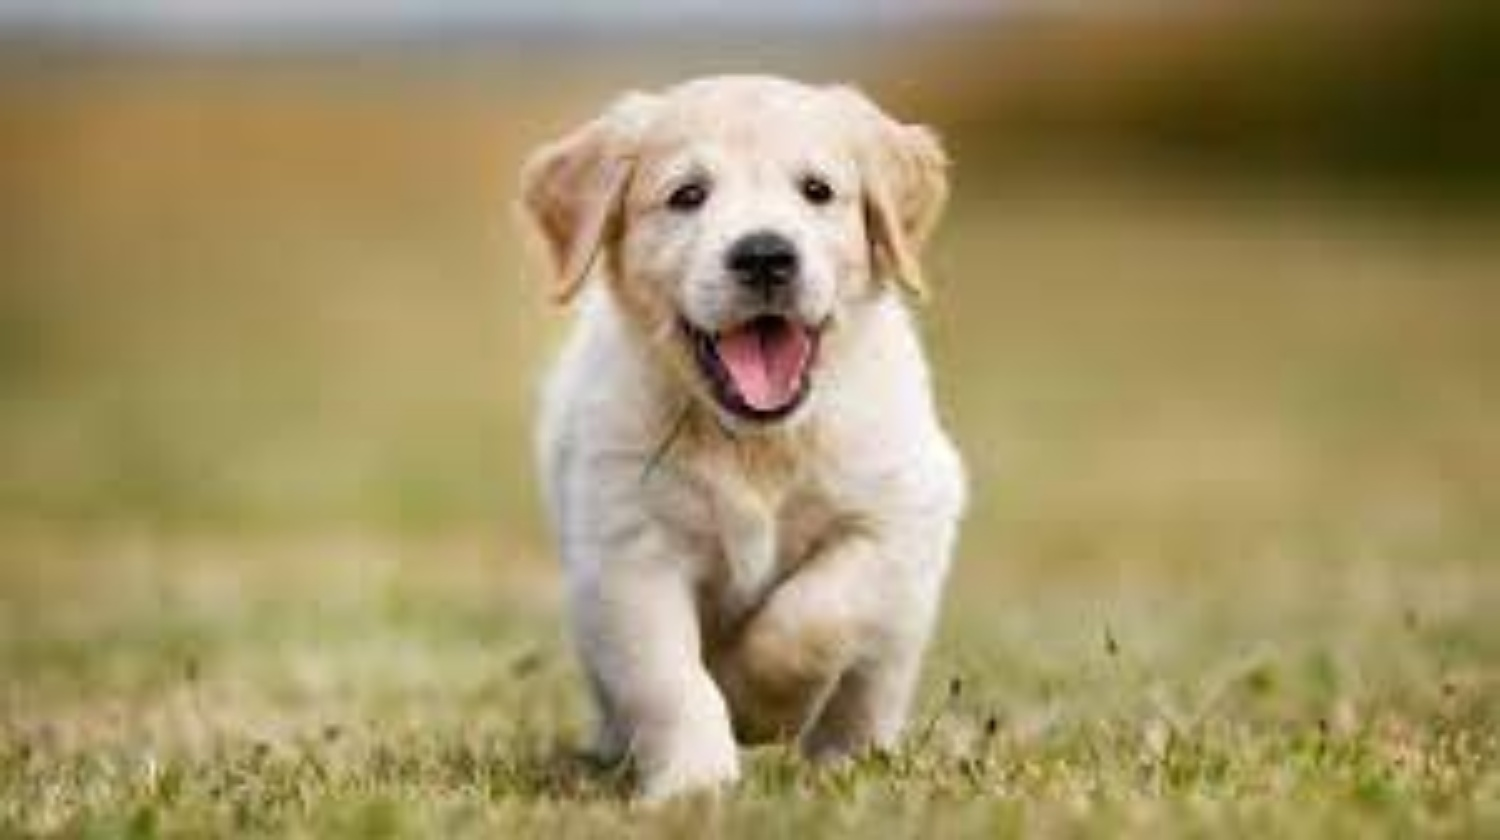

CPU times: total: 46.9 ms
Wall time: 33.2 ms


In [53]:
%%time
#ANS
#Linear Interpolation
img4 = cv.imread('images/dog.jfif')
resizedA_img4 = cv.resize(img4,None, fx=5,fy=5,interpolation = cv.INTER_LINEAR)
cv.imwrite('resizedA_image.jpg', resizedA_img4)
    
# Display the resized image
display(Image('resizedA_image.jpg'))

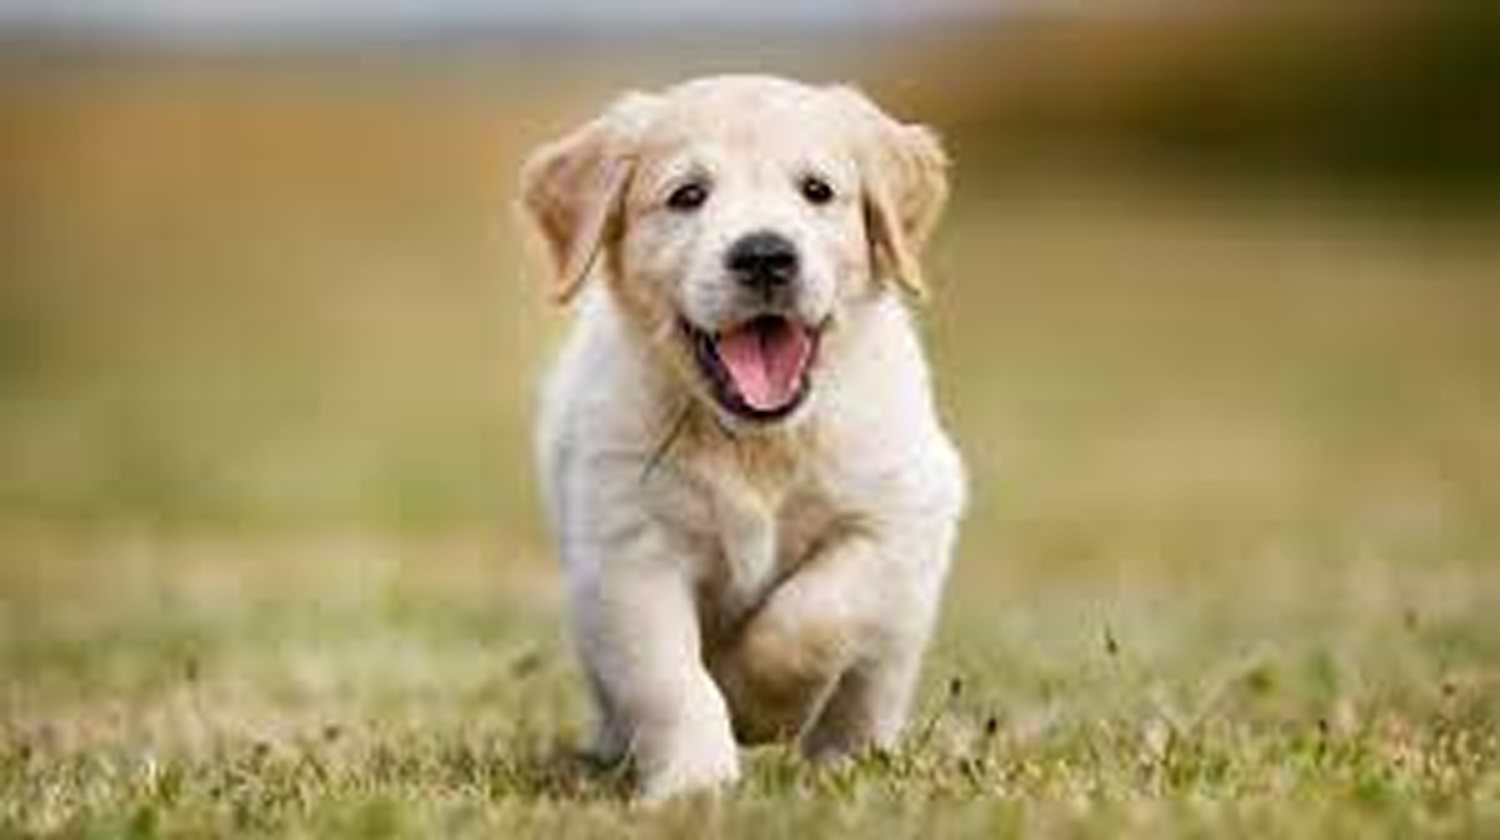

CPU times: total: 31.2 ms
Wall time: 51.6 ms


In [54]:
%%time
#ANS
#Linear Interpolation
img4 = cv.imread('images/dog.jfif')
resizedB_img4 = cv.resize(img4,None, fx=5,fy=5,interpolation = cv.INTER_CUBIC)
cv.imwrite('resizedB_image.jpg', resizedB_img4)
    
# Display the resized image
display(Image('resizedB_image.jpg'))

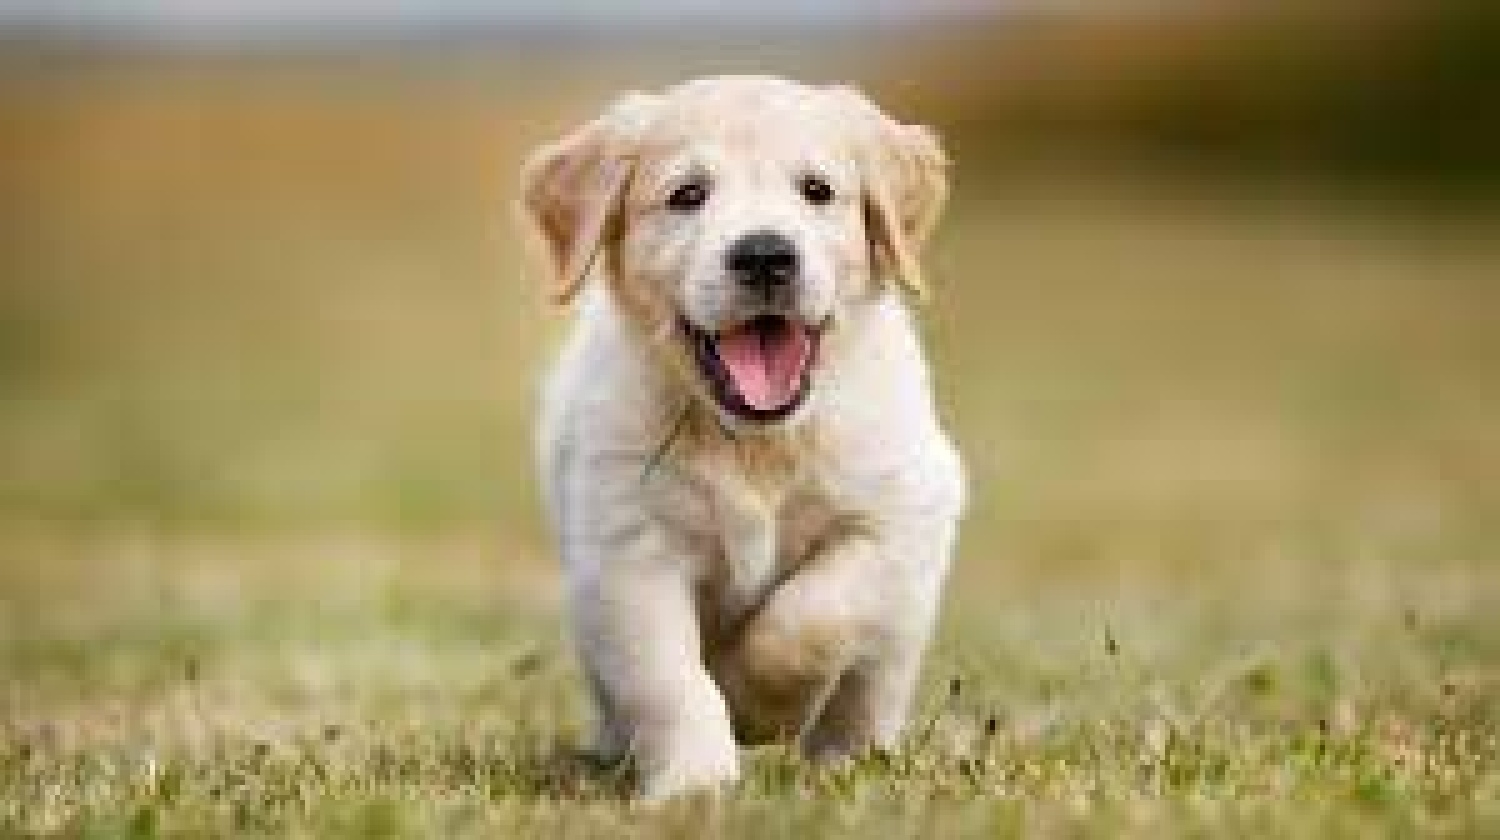

CPU times: total: 15.6 ms
Wall time: 33.4 ms


In [55]:
%%time
#ANS
#Linear Interpolation
img4 = cv.imread('images/dog.jfif')
resizedC_img4 = cv.resize(img4,None, fx=5,fy=5,interpolation = cv.INTER_NEAREST)
cv.imwrite('resizedC_image.jpg', resizedC_img4)
    
# Display the resized image
display(Image('resizedC_image.jpg'))

The results shows that the wall time=real-world time, clock time, wall-clock time or -- more accurately -- elapsed real time
<br><br>The lineaer algorithm and nearest neighbour algorithm almost has the same execution time, however the quality of the images is worse on nearest neighbour algorithm.
<br><br>The cubic algorithm achieve a somehwat better result in quality but slow speed.